In [1]:
# %% Initialize

import numpy as np
import matplotlib.pyplot as plt
import pickle


# own class
from Algorithms import RoS

# plot setting
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "ps.usedistiller": "xpdf"})


In [2]:
max_iter = 301  # total oracle calls to samples
batch_list = [20]  # , 100]
number_experiment = 20  # number of repeated experiment

# Dh
BG_Dh, BGVR_Dh, SCSC_Dh, NASA_Dh = [
    np.zeros([number_experiment, max_iter, len(batch_list)]) for _ in range(4)]
BG_Dh_avg, BGVR_Dh_avg, SCSC_Dh_avg, NASA_Dh_avg = [
    np.zeros([number_experiment, max_iter, len(batch_list)]) for _ in range(4)]

# determinastic gradient
BG_gradF_det, BGVR_gradF_det, SCSC_gradF_det, NASA_gradF_det = [
    np.zeros([number_experiment, max_iter, len(batch_list)]) for _ in range(4)]
BG_gradF_det_avg, BGVR_gradF_det_avg, SCSC_gradF_det_avg, NASA_gradF_det_avg = [
    np.zeros([number_experiment, max_iter, len(batch_list)]) for _ in range(4)]

# function values
BG_Fval, BGVR_Fval, SCSC_Fval, NASA_Fval = [
    np.zeros([number_experiment, max_iter, len(batch_list)]) for _ in range(4)]
BG_Fval_avg, BGVR_Fval_avg, SCSC_Fval_avg, NASA_Fval_avg = [
    np.zeros([number_experiment, max_iter, len(batch_list)]) for _ in range(4)]

# read data
folder = f'Results/exp_algs_compare/'
tau = 63.1
for idx_batch in range(len(batch_list)):
    for idx_exp in range(number_experiment):

        with open(folder + f'Breg_batch{batch_list[idx_batch]}_exp{idx_exp}.pickle', 'rb') as file:
            BG_exp = pickle.load(file)
        BG_Fval[idx_exp, 0:max_iter, idx_batch] = BG_exp.val_F_traj
        BG_Fval_avg[idx_exp, 0:max_iter, idx_batch] = BG_exp.val_F_avg_traj

        BG_Dh_avg[idx_exp, 0:max_iter, idx_batch] = BG_exp.Dh_avg_traj
        BG_Dh[idx_exp, 0:max_iter, idx_batch] = BG_exp.Dh_traj

        BG_gradF_det[idx_exp, 0:max_iter,
                     idx_batch] = BG_exp.norm_gradFdet_traj
        BG_gradF_det_avg[idx_exp, 0:max_iter,
                         idx_batch] = BG_exp.norm_gradFdet_avg_traj

        with open(folder + f'BGVR_batch{batch_list[idx_batch]}_exp{idx_exp}.pickle', 'rb') as file:
            BGVR_exp = pickle.load(file)
        BGVR_Fval[idx_exp, 0:max_iter,
                  idx_batch] = BGVR_exp.val_F_traj[0:max_iter]
        BGVR_Fval_avg[idx_exp, 0:max_iter,
                      idx_batch] = BGVR_exp.val_F_avg_traj[0:max_iter]

        BGVR_Dh_avg[idx_exp, 0:max_iter,
                    idx_batch] = BGVR_exp.Dh_avg_traj[0:max_iter]
        BGVR_Dh[idx_exp, 0:max_iter, idx_batch] = BGVR_exp.Dh_traj[0:max_iter]

        BGVR_gradF_det[idx_exp, 0:max_iter,
                       idx_batch] = BGVR_exp.norm_gradFdet_traj[0:max_iter]
        BGVR_gradF_det_avg[idx_exp, 0:max_iter,
                           idx_batch] = BGVR_exp.norm_gradFdet_avg_traj[0:max_iter]

        with open(folder + f'SCSC_batch{batch_list[idx_batch]}_exp{idx_exp}.pickle', 'rb') as file:
            SCSC_exp = pickle.load(file)
        SCSC_Fval[idx_exp, 0:max_iter, idx_batch] = SCSC_exp.val_F_traj
        SCSC_Fval_avg[idx_exp, 0:max_iter, idx_batch] = SCSC_exp.val_F_avg_traj

        SCSC_Dh_avg[idx_exp, 0:max_iter, idx_batch] = SCSC_exp.Dh_avg_traj
        SCSC_Dh[idx_exp, 0:max_iter, idx_batch] = SCSC_exp.Dh_traj

        SCSC_gradF_det[idx_exp, 0:max_iter,
                       idx_batch] = SCSC_exp.norm_gradFdet_traj
        SCSC_gradF_det_avg[idx_exp, 0:max_iter,
                           idx_batch] = SCSC_exp.norm_gradFdet_avg_traj

        # with open(folder + f'NASA_batch{batch_list[idx_batch]}_exp{idx_exp}.pickle', 'rb') as file:
        with open(folder + f'NASA_batch{1}_exp{idx_exp}.pickle', 'rb') as file:
            NASA_exp = pickle.load(file)
        NASA_Fval[idx_exp, 0:max_iter, idx_batch] = NASA_exp.val_F_traj
        NASA_Fval_avg[idx_exp, 0:max_iter, idx_batch] = NASA_exp.val_F_avg_traj

        NASA_Dh_avg[idx_exp, 0:max_iter, idx_batch] = NASA_exp.Dh_avg_traj
        NASA_Dh[idx_exp, 0:max_iter, idx_batch] = NASA_exp.Dh_traj

        NASA_gradF_det[idx_exp, 0:max_iter,
                       idx_batch] = NASA_exp.norm_gradFdet_traj
        NASA_gradF_det_avg[idx_exp, 0:max_iter,
                           idx_batch] = NASA_exp.norm_gradFdet_avg_traj

        # sample oracle calls
        BGVR_oracle_val = BGVR_exp.oracle_val
        BGVR_oracle_grad = BGVR_exp.oracle_grad
        BG_oracle_val = BG_exp.oracle_val
        BG_oracle_grad = BG_exp.oracle_grad
        SCSC_oracle_val = SCSC_exp.oracle_val
        SCSC_oracle_grad = SCSC_exp.oracle_grad
        NASA_oracle_val = NASA_exp.oracle_val
        NASA_oracle_grad = NASA_exp.oracle_grad


In [3]:
def plot_line(xrange, data, ax, **kwargs):
    # plot each experiment and their average
    # array shape n x L, where n is the number of experiment, L is the length of one experiment

    color, label, marker, markevery = kwargs.get('color'), kwargs.get(
        'label'), kwargs.get('marker'), kwargs.get('markevery')
    linestyle = kwargs.get('linestyle')
    alpha = kwargs.get('alpha', 0.1)

    data_mean = np.mean(data, axis=0)

    ax.plot(xrange, data_mean, color=color, label=label,
            marker=marker, markevery=markevery, linestyle=linestyle)
    for idx in range(data.shape[0]):
        ax.fill_between(xrange,
                        data[idx, :], data_mean, color=color, alpha=alpha)


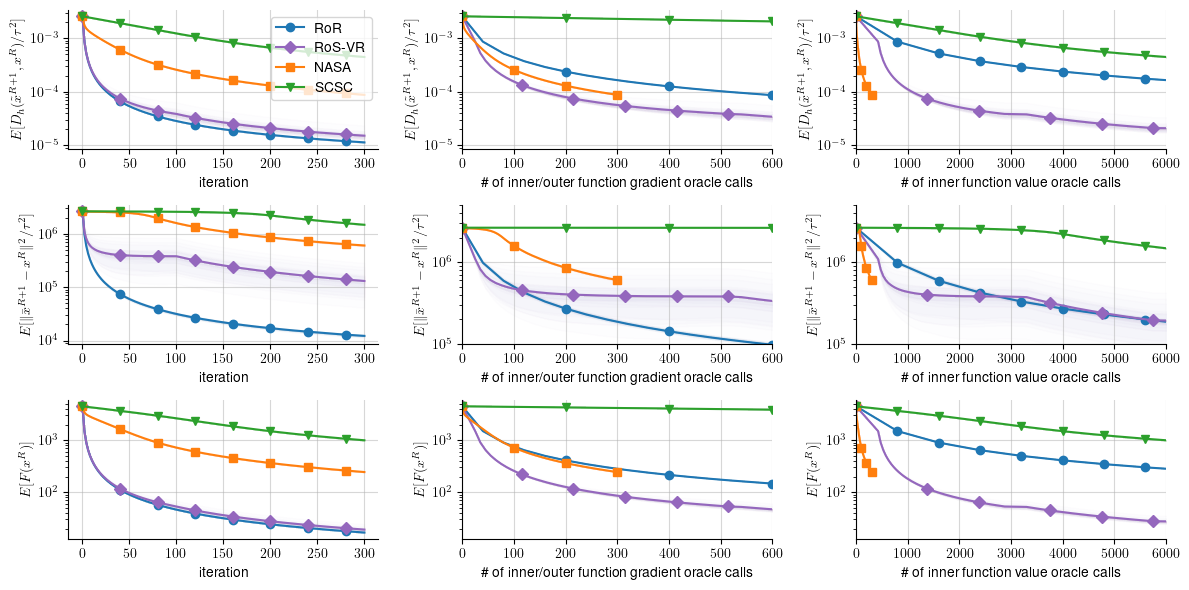

In [7]:
kwargs_plot = {'BG': {'color': 'C0', 'marker': 'o',  'label': 'RoR'},
               'BGVR': {'color': 'C4', 'marker': 'D',  'label': 'RoS-VR'},
               'NASA': {'color': 'C1', 'marker': 's',  'label': 'NASA'},
               'SCSC': {'color': 'C2', 'marker': 'v',  'label': 'SCSC'},
               'fill': {'alpha': 0.01},
               'mark20': {'markevery': 20},
               }

fig, axs = plt.subplots(3, 3, figsize=(12, 6))
max_iter = max_iter
idx_batch = 0
# Dh
ax = axs[0, 0]
plot_line(np.arange(0, max_iter, 2),
          BG_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['BG'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2),
          BGVR_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['BGVR'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2),
          NASA_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['NASA'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2),
          SCSC_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['SCSC'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
ax.set_xlabel('iteration')
ax.set_ylabel(r"$E[D_{h}(\tilde{x}^{R+1}, x^R)/\tau^2]$")
ax.legend()
ax = axs[0, 1]
plot_line(BG_oracle_grad[0:max_iter:2],
          BG_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['BG'] | kwargs_plot['fill'] | {'markevery': 5})
plot_line(BGVR_oracle_grad[0:max_iter:2],
          BGVR_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['BGVR'] | kwargs_plot['fill'] | {'markevery': 10})
plot_line(NASA_oracle_grad[0:max_iter:2],
          NASA_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['NASA'] | kwargs_plot['fill'] | {'markevery': 50})
plot_line(SCSC_oracle_grad[0:max_iter:2],
          SCSC_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['SCSC'] | kwargs_plot['fill'] | {'markevery': 5})
ax.set_xlabel('\# of inner/outer function gradient oracle calls')
ax.set_ylabel(r"$E[D_{h}(\tilde{x}^{R+1}, x^R)/\tau^2]$")
ax.set_xlim([0, 600])
# region
ax = axs[0, 2]
plot_line(BG_oracle_val[0:max_iter:2],
          BG_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['BG'] | kwargs_plot['fill'])
plot_line(BGVR_oracle_val[0:max_iter:2],
          BGVR_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['BGVR'] | kwargs_plot['fill'] | {'markevery': 20})
plot_line(NASA_oracle_val[0:max_iter:2],
          NASA_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['NASA'] | kwargs_plot['fill'] | {'markevery': 50})
plot_line(SCSC_oracle_val[0:max_iter:2],
          SCSC_Dh_avg[:, 0:max_iter:2, idx_batch]/tau**2, ax, **kwargs_plot['SCSC'] | kwargs_plot['fill'] | {'markevery': 20})
ax.set_xlabel('\# of inner function value oracle calls')
ax.set_ylabel(r"$E[D_{h}(\tilde{x}^{R+1}, x^R)/\tau^2]$")
ax.set_xlim([0, 6e3])


# norm of gradient
ax = axs[1, 0]
plot_line(np.arange(0, max_iter, 2),
          BG_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BG'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2),
          BGVR_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BGVR'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2),
          NASA_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['NASA'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2),
          SCSC_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['SCSC'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
ax.set_ylabel(r"$E[\|\bar{x}^{R+1} - x^R\|^2/\tau^2]$")
ax.set_xlabel('iteration')

ax = axs[1, 1]
plot_line(BG_oracle_grad[0:max_iter:2],
          BG_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BG'] | kwargs_plot['fill'] | {'markevery': 5})
plot_line(BGVR_oracle_grad[0:max_iter:2],
          BGVR_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BGVR'] | kwargs_plot['fill'] | {'markevery': 10})
plot_line(NASA_oracle_grad[0:max_iter:2],
          NASA_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['NASA'] | kwargs_plot['fill'] | {'markevery': 50})
plot_line(SCSC_oracle_grad[0:max_iter:2],
          SCSC_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['SCSC'] | kwargs_plot['fill'] | {'markevery': 5})
ax.set_xlabel('\# of inner/outer function gradient oracle calls')
ax.set_ylabel(r"$E[\|\bar{x}^{R+1} - x^R\|^2/\tau^2]$")
ax.set_xlim([0, 600])
ax.set_ylim([1e5, 5e6])

ax = axs[1, 2]
plot_line(BG_oracle_val[0:max_iter:2],
          BG_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BG'] | kwargs_plot['fill'])
plot_line(BGVR_oracle_val[0:max_iter:2],
          BGVR_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BGVR'] | kwargs_plot['fill'] | {'markevery': 20})
plot_line(NASA_oracle_val[0:max_iter:2],
          NASA_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['NASA'] | kwargs_plot['fill'] | {'markevery': 50})
plot_line(SCSC_oracle_val[0:max_iter:2],
          SCSC_gradF_det_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['SCSC'] | kwargs_plot['fill'] | {'markevery': 20})
ax.set_xlabel('\# of inner function value oracle calls')
ax.set_ylabel(r"$E[\|\bar{x}^{R+1} - x^R\|^2/\tau^2]$")
ax.set_xlim([0, 6e3])
ax.set_ylim([1e5, 5e6])

ax = axs[2, 0]
plot_line(np.arange(0, max_iter, 2), BG_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **
          kwargs_plot['BG'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2), BGVR_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **
          kwargs_plot['BGVR'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2), NASA_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **
          kwargs_plot['NASA'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
plot_line(np.arange(0, max_iter, 2), SCSC_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **
          kwargs_plot['SCSC'] | kwargs_plot['fill'] | kwargs_plot['mark20'])
ax.set_ylabel(r"$E[F(x^R)]$")
ax.set_xlabel('iteration')

# region
ax = axs[2, 1]
plot_line(BG_oracle_grad[0:max_iter:2],
          BG_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BG'] | kwargs_plot['fill'] | {'markevery': 5})
plot_line(BGVR_oracle_grad[0:max_iter:2],
          BGVR_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BGVR'] | kwargs_plot['fill'] | {'markevery': 10})
plot_line(NASA_oracle_grad[0:max_iter:2],
          NASA_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['NASA'] | kwargs_plot['fill'] | {'markevery': 50})
plot_line(SCSC_oracle_grad[0:max_iter:2],
          SCSC_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['SCSC'] | kwargs_plot['fill'] | {'markevery': 5})
ax.set_xlabel('\# of inner/outer function gradient oracle calls')
ax.set_xlim([0, 600])
ax.set_ylabel(r"$E[F(x^R)]$")
# endregion
ax = axs[2, 2]
plot_line(BG_oracle_val[0:max_iter:2],
          BG_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BG'] | kwargs_plot['fill'])
plot_line(BGVR_oracle_val[0:max_iter:2],
          BGVR_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['BGVR'] | kwargs_plot['fill'] | {'markevery': 20})
plot_line(NASA_oracle_val[0:max_iter:2],
          NASA_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['NASA'] | kwargs_plot['fill'] | {'markevery': 50})
plot_line(SCSC_oracle_val[0:max_iter:2],
          SCSC_Fval_avg[:, 0:max_iter:2, idx_batch], ax, **kwargs_plot['SCSC'] | kwargs_plot['fill'] | {'markevery': 20})
ax.set_xlabel('\# of inner function value oracle calls')
ax.set_ylabel(r"$E[F(x^R)]$")
ax.set_xlim([0, 6e3])


for ax in axs.flat:
    ax.set_yscale("log")
    ax.grid(True, alpha=0.5)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('Plots/RoS_algs_compare.pdf', bbox_inches='tight')

# endregion


In [70]:
kwargs_plot = {'BG': {'color': 'C0', 'marker': 'o', 'markevery': 50, 'label': 'RoS'},
               'NASA': {'color': 'C1', 'marker': 's', 'markevery': 60, 'label': 'NASA'},
               'SCSC': {'color': 'C2', 'marker': 'v', 'markevery': 70, 'label': 'SCSC'},
               'fill': {'alpha': 0.05},
               'batch200': {'color': 'C0', 'linestyle': 'solid', 'label': r"$|\mathcal{B}_{\nabla}| = 100$"},
               'batch20': {'color': 'C1', 'linestyle': 'dotted', 'label': r"$|\mathcal{B}_{\nabla}| = 10$"},
               'batch1': {'color': 'C2', 'linestyle': 'dashed', 'label': r"$|\mathcal{B}_{\nabla}| = 1$"}
               }
batch_list = [100, 20]
number_experiment = 20  # number of repeated experiment
# Dh
BG_Dh = np.zeros([number_experiment, max_iter, len(batch_list)])
BG_Dh_avg = np.zeros([number_experiment, max_iter, len(batch_list)])

# determinastic gradient
BG_gradF_det = np.zeros([number_experiment, max_iter, len(batch_list)])
BG_gradF_det_avg = np.zeros([number_experiment, max_iter, len(batch_list)])

# function values
BG_Fval = np.zeros([number_experiment, max_iter, len(batch_list)])
BG_Fval_avg = np.zeros([number_experiment, max_iter, len(batch_list)])

# Dh
BGVR_Dh = np.zeros([number_experiment, max_iter, len(batch_list)])
BGVR_Dh_avg = np.zeros([number_experiment, max_iter, len(batch_list)])

# determinastic gradient
BGVR_gradF_det = np.zeros([number_experiment, max_iter, len(batch_list)])
BGVR_gradF_det_avg = np.zeros([number_experiment, max_iter, len(batch_list)])

# function values
BGVR_Fval = np.zeros([number_experiment, max_iter, len(batch_list)])
BGVR_Fval_avg = np.zeros([number_experiment, max_iter, len(batch_list)])
BG_oracle_grad = np.zeros([max_iter, len(batch_list)])
BGVR_oracle_grad = np.zeros([max_iter, len(batch_list)])
BG_oracle_val = np.zeros([max_iter, len(batch_list)])
BGVR_oracle_val = np.zeros([max_iter, len(batch_list)])

# read data
folder = f'Results/exp_algs_compare/'
for idx_batch in range(len(batch_list)):

    for idx_exp in range(number_experiment):

        with open(folder + f'Breg_batch{batch_list[idx_batch]}_exp{idx_exp}.pickle', 'rb') as file:
            BG_exp = pickle.load(file)
        BG_Fval[idx_exp, 0:max_iter, idx_batch] = BG_exp.val_F_traj
        BG_Fval_avg[idx_exp, 0:max_iter, idx_batch] = BG_exp.val_F_avg_traj

        BG_Dh_avg[idx_exp, 0:max_iter, idx_batch] = BG_exp.Dh_avg_traj
        BG_Dh[idx_exp, 0:max_iter, idx_batch] = BG_exp.Dh_traj

        BG_gradF_det[idx_exp, 0:max_iter,
                     idx_batch] = BG_exp.norm_gradFdet_traj
        BG_gradF_det_avg[idx_exp, 0:max_iter,
                         idx_batch] = BG_exp.norm_gradFdet_avg_traj

        with open(folder + f'BGVR_batch{batch_list[idx_batch]}_exp{idx_exp}.pickle', 'rb') as file:
            BGVR_exp = pickle.load(file)

        BGVR_Fval[idx_exp, 0:max_iter, idx_batch] = BGVR_exp.val_F_traj
        BGVR_Fval_avg[idx_exp, 0:max_iter, idx_batch] = BGVR_exp.val_F_avg_traj

        BGVR_Dh_avg[idx_exp, 0:max_iter, idx_batch] = BGVR_exp.Dh_avg_traj
        BGVR_Dh[idx_exp, 0:max_iter, idx_batch] = BGVR_exp.Dh_traj

        BGVR_gradF_det[idx_exp, 0:max_iter,
                       idx_batch] = BGVR_exp.norm_gradFdet_traj
        BGVR_gradF_det_avg[idx_exp, 0:max_iter,
                           idx_batch] = BGVR_exp.norm_gradFdet_avg_traj
    BG_oracle_val[:, idx_batch] = BG_exp.oracle_val
    BG_oracle_grad[:, idx_batch] = BG_exp.oracle_grad
    BGVR_oracle_val[:, idx_batch] = BGVR_exp.oracle_val
    BGVR_oracle_grad[:, idx_batch] = BGVR_exp.oracle_grad


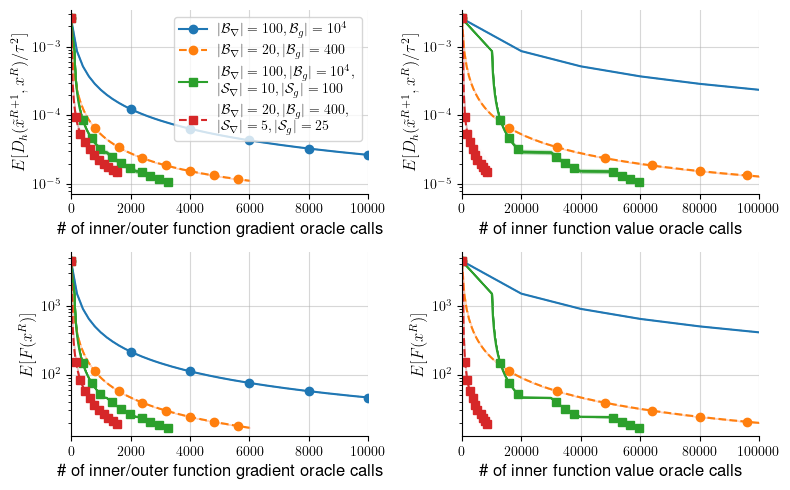

In [71]:

kwargs_plot = {'BG100': {'color': 'C0', 'marker': 'o', 'markevery': 10, 'label': r"$|\mathcal{B}_{\nabla}| = 100,\mathcal{B}_{g}| = 10^4$", 'alpha': 0.01},
               'BG20': {'color': 'C1', 'marker': 'o', 'linestyle': 'dashed', 'markevery': 20, 'label': r"$|\mathcal{B}_{\nabla}| = 20,|\mathcal{B}_{g}| = 400$", 'alpha': 0.01},
               'BGVR100': {'color': 'C2', 'marker': 's', 'markevery': 15, 'label': r"$|\mathcal{B}_{\nabla}| = 100, |\mathcal{B}_{g}| = 10^4,$" + "\n" + r"$|\mathcal{S}_{\nabla}| = 10, |\mathcal{S}_{g}| = 100$"},
               'BGVR20': {'color': 'C3', 'marker': 's', 'linestyle': 'dashed', 'markevery': 15, 'label': r"$|\mathcal{B}_{\nabla}| = 20, |\mathcal{B}_{g}| = 400,$" + "\n" + r"$|\mathcal{S}_{\nabla}| = 5,|\mathcal{S}_{g}| = 25$", 'alpha': 0.01}
               }
# plot Bregman method for different batches
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Dh
ax = axs[0, 0]
plot_line(BG_oracle_grad[0:max_iter:2, 0], BG_Dh_avg[:, 0:max_iter:2, 0] / tau ** 2, ax, **
          kwargs_plot['BG100'])
plot_line(BG_oracle_grad[0:max_iter:2, 1], BG_Dh_avg[:, 0:max_iter:2, 1] / tau ** 2, ax, **
          kwargs_plot['BG20'])
plot_line(BGVR_oracle_grad[0:max_iter:2, 0], BGVR_Dh_avg[:, 0:max_iter:2, 0] / tau ** 2, ax, **
          kwargs_plot['BGVR100'])
plot_line(BGVR_oracle_grad[0:max_iter:2, 1], BGVR_Dh_avg[:, 0:max_iter:2, 1] / tau ** 2, ax, **
          kwargs_plot['BGVR20'])
ax.set_xlabel("\# of inner/outer function gradient oracle calls", fontsize=12)
ax.set_ylabel(r"$E[D_{h}(\tilde{x}^{R+1}, x^R)/\tau^2]$", fontsize=12)
ax.set_xlim([0, 1e4])
ax.legend()
ax = axs[0, 1]
plot_line(BG_oracle_val[0:max_iter:2, 0], BG_Dh_avg[:, 0:max_iter:2, 0] / tau ** 2, ax, **
          kwargs_plot['BG100'])
plot_line(BG_oracle_val[0:max_iter:2, 1], BG_Dh_avg[:, 0:max_iter:2, 1] / tau ** 2, ax, **
          kwargs_plot['BG20'])
plot_line(BGVR_oracle_val[0:max_iter:2, 0], BGVR_Dh_avg[:, 0:max_iter:2, 0] / tau ** 2, ax, **
          kwargs_plot['BGVR100'])
plot_line(BGVR_oracle_val[0:max_iter:2, 1], BGVR_Dh_avg[:, 0:max_iter:2, 1] / tau ** 2, ax, **
          kwargs_plot['BGVR20'])
ax.set_xlabel("\# of inner function value oracle calls", fontsize=12)
ax.set_ylabel(r"$E[D_{h}(\tilde{x}^{R+1}, x^R)/\tau^2]$", fontsize=12)
ax.set_xlim([0, 1e5])

# # function values

ax = axs[1, 0]
plot_line(BG_oracle_grad[0:max_iter:2, 0], BG_Fval_avg[:, 0:max_iter:2, 0], ax, **
          kwargs_plot['BG100'])
plot_line(BG_oracle_grad[0:max_iter:2, 1], BG_Fval_avg[:, 0:max_iter:2, 1], ax, **
          kwargs_plot['BG20'])
plot_line(BGVR_oracle_grad[0:max_iter:2, 0], BGVR_Fval_avg[:, 0:max_iter:2, 0], ax, **
          kwargs_plot['BGVR100'])
plot_line(BGVR_oracle_grad[0:max_iter:2, 1], BGVR_Fval_avg[:, 0:max_iter:2, 1], ax, **
          kwargs_plot['BGVR20'])
ax.set_xlabel("\# of inner/outer function gradient oracle calls", fontsize=12)
ax.set_ylabel(r"$E[F(x^R)]$", fontsize=12)
ax.set_xlim([0, 1e4])


ax = axs[1, 1]
plot_line(BG_oracle_val[0:max_iter:2, 0], BG_Fval_avg[:, 0:max_iter:2, 0], ax, **
          kwargs_plot['BG100'])
plot_line(BG_oracle_val[0:max_iter:2, 1], BG_Fval_avg[:, 0:max_iter:2, 1], ax, **
          kwargs_plot['BG20'])
plot_line(BGVR_oracle_val[0:max_iter:2, 0], BGVR_Fval_avg[:, 0:max_iter:2, 0], ax, **
          kwargs_plot['BGVR100'])
plot_line(BGVR_oracle_val[0:max_iter:2, 1], BGVR_Fval_avg[:, 0:max_iter:2, 1], ax, **
          kwargs_plot['BGVR20'])
ax.set_xlabel("\# of inner function value oracle calls", fontsize=12)
ax.set_ylabel(r"$E[F(x^R)]$", fontsize=12)
ax.set_xlim([0, 1e5])


for ax in axs.flat:
    ax.set_yscale("log")
    ax.grid(True, alpha=0.5)
    # ax.legend()
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
fig.tight_layout()

fig.savefig('Plots/RoS_batch_compare.pdf', bbox_inches='tight')
